In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Depression and Happiness Factor Analysis.csv')
data.drop(['Timestamp'], axis = 1, inplace = True)
data.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,1st year,Normal,80,Male,23,Home,In a relationship,No,4,Normal,Not applicable,Yes,Yes,Friends,Yes,Yes,Yes,No,No,9
1,2nd year,Good,90,Male,22,Hall-Mess,Single,Yes,3,Good,No,No,Yes,Family,Yes,Maybe,No,Yes,Yes,6
2,3rd year,Normal,50,Male,21,Home,In a relationship,No,3,Normal,Yes,Yes,No,Family,Yes,Yes,Neutral,Yes,Yes,8
3,4th year,Very bad,1,Male,23,Home,Broken Up,No,1,Bad,Yes,No,No,No one,Yes,Yes,No,Yes,No,4
4,3rd year,Bad,20,Male,23,Home,In a relationship,No,5,Good,Yes,No,Yes,No one,Yes,Yes,No,Yes,No,11


In [3]:
data1 = data.copy()

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Data Processing

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1 = data.apply(LabelEncoder().fit_transform)
data1

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,0,2,79,0,3,2,1,0,3,2,1,2,1,1,0,2,2,0,0,6
1,1,1,89,0,2,1,3,1,2,1,0,0,1,0,0,0,1,1,1,3
2,2,2,49,0,1,2,1,0,2,2,2,2,0,0,0,2,0,1,1,5
3,3,3,0,0,3,2,0,0,0,0,2,0,0,2,0,2,1,1,0,1
4,2,0,19,0,3,2,1,0,4,1,2,0,1,2,0,2,1,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3,0,25,0,3,1,3,1,2,2,2,0,0,0,0,1,2,0,1,1
746,3,0,36,0,3,1,3,1,1,2,2,0,0,0,0,0,1,0,1,0
747,3,1,71,0,3,0,3,1,3,1,0,0,1,0,0,1,2,0,0,4
748,3,1,88,0,3,1,3,1,2,1,0,0,1,1,0,1,0,0,1,6


# Performing Principle Component Analysis(PCA) with chosen number of components

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components = 2)

In [8]:
pca.fit(data1)

PCA(n_components=2)

In [9]:
pca.transform(data1)

array([[-23.00506834,   0.6079884 ],
       [-32.81685482,  -2.92270292],
       [  7.05063974,   1.06965333],
       ...,
       [-14.94314706,  -1.21891679],
       [-31.97361469,  -0.74949098],
       [ -8.88748672,  -1.18136208]])

In [10]:
score_pca = pca.transform(data1)
score_pca.shape

(750, 2)

# Chosing K using Elbow method

In [11]:
wcss = []    #WCSS is the sum of squared distance between each point and the centroid in a cluster

for k in range(1,9):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(score_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

wcss

[746285.721395787,
 162583.55669738835,
 69460.35737589505,
 37645.25831710725,
 23222.34342393017,
 17071.082142963813,
 12900.886840270114,
 9818.134390142444]

Text(0.5, 1.0, 'K-means with PCA clustering')

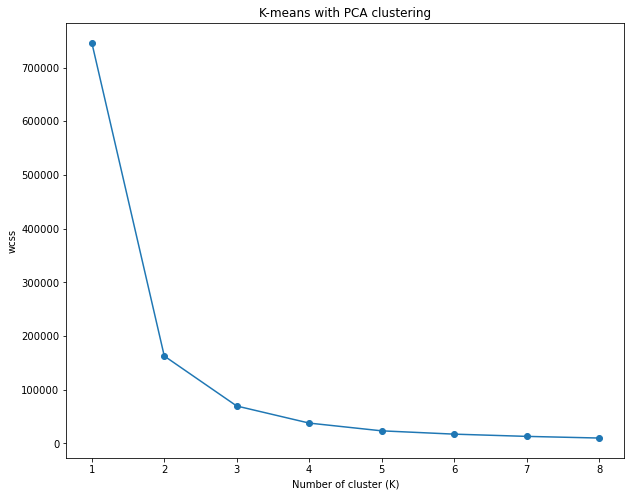

In [12]:
plt.figure(figsize=(10,8))
plt.plot(range(1,9), wcss, marker = 'o', linestyle = '-')
plt.xlabel('Number of cluster (K)')
plt.ylabel('wcss')
plt.title('K-means with PCA clustering')

In [13]:
km  = KMeans(n_clusters= 2)
km

KMeans(n_clusters=2)

In [14]:
km.fit(score_pca)

KMeans(n_clusters=2)

In [15]:
y_pred = km.fit_predict(score_pca)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

# Analyze the Results of PCA and K-Means Clustering

In [16]:
df = pd.concat([data1.reset_index(drop = True), pd.DataFrame(score_pca)], axis = 1)
df.columns.values[-2: ] = ['Component 1', 'Component 2']
df['Segment K-means PCA'] = km.labels_

In [17]:
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,...,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours),Component 1,Component 2,Segment K-means PCA
0,0,2,79,0,3,2,1,0,3,2,...,1,0,2,2,0,0,6,-23.005068,0.607988,0
1,1,1,89,0,2,1,3,1,2,1,...,0,0,0,1,1,1,3,-32.816855,-2.922703,0
2,2,2,49,0,1,2,1,0,2,2,...,0,0,2,0,1,1,5,7.050640,1.069653,1
3,3,3,0,0,3,2,0,0,0,0,...,2,0,2,1,1,0,1,56.205199,1.013472,1
4,2,0,19,0,3,2,1,0,4,1,...,2,0,2,1,1,0,8,36.799916,3.841870,1


In [18]:
df['segment'] = df['Segment K-means PCA'].map({0:'first', 1:'second'})

In [19]:
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,...,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours),Component 1,Component 2,Segment K-means PCA,segment
0,0,2,79,0,3,2,1,0,3,2,...,0,2,2,0,0,6,-23.005068,0.607988,0,first
1,1,1,89,0,2,1,3,1,2,1,...,0,0,1,1,1,3,-32.816855,-2.922703,0,first
2,2,2,49,0,1,2,1,0,2,2,...,0,2,0,1,1,5,7.050640,1.069653,1,second
3,3,3,0,0,3,2,0,0,0,0,...,0,2,1,1,0,1,56.205199,1.013472,1,second
4,2,0,19,0,3,2,1,0,4,1,...,0,2,1,1,0,8,36.799916,3.841870,1,second


# Ploting graph of Clustering

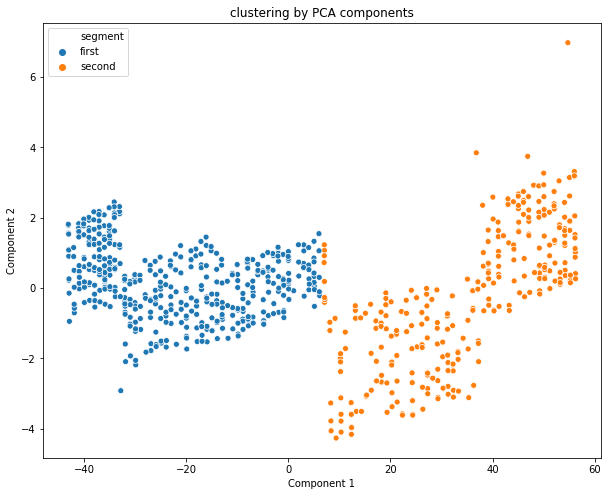

In [20]:
x_axis = df['Component 1']
y_axis = df['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df['segment'])
plt.title('clustering by PCA components')
plt.show()